In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse
import seaborn as sns

In [2]:
#importa datos del aranet4
aranet = pd.read_csv("../../data/aranet4_20210624.csv",index_col=0,parse_dates=True,
                    names=["aranet","To","HR","P"],skiprows=1)

aranet = aranet.resample("60S").mean()
aranet

aranet    To  HR    P
2021-06-21 07:52:00     448  25.0  60  871
2021-06-21 07:53:00     449  25.0  60  871
2021-06-21 07:54:00     457  25.0  60  871
2021-06-21 07:55:00     439  24.9  60  871
2021-06-21 07:56:00     449  24.9  60  871
...                     ...   ...  ..  ...
2021-06-25 10:25:00     487  25.3  67  880
2021-06-25 10:26:00     471  25.2  67  880
2021-06-25 10:27:00     459  25.1  67  880
2021-06-25 10:28:00     442  25.0  67  880
2021-06-25 10:29:00     457  25.0  67  880

[5918 rows x 4 columns]

In [3]:
nocturna = pd.read_csv("../../data/sensores_20210623_20210625.csv",index_col=0,parse_dates=True)
nocturna = nocturna.resample("60S").mean()
# nocturna

In [4]:
# nocturna.columns
sensores = ['t3022', 'mh-z14a', 'sen0219']

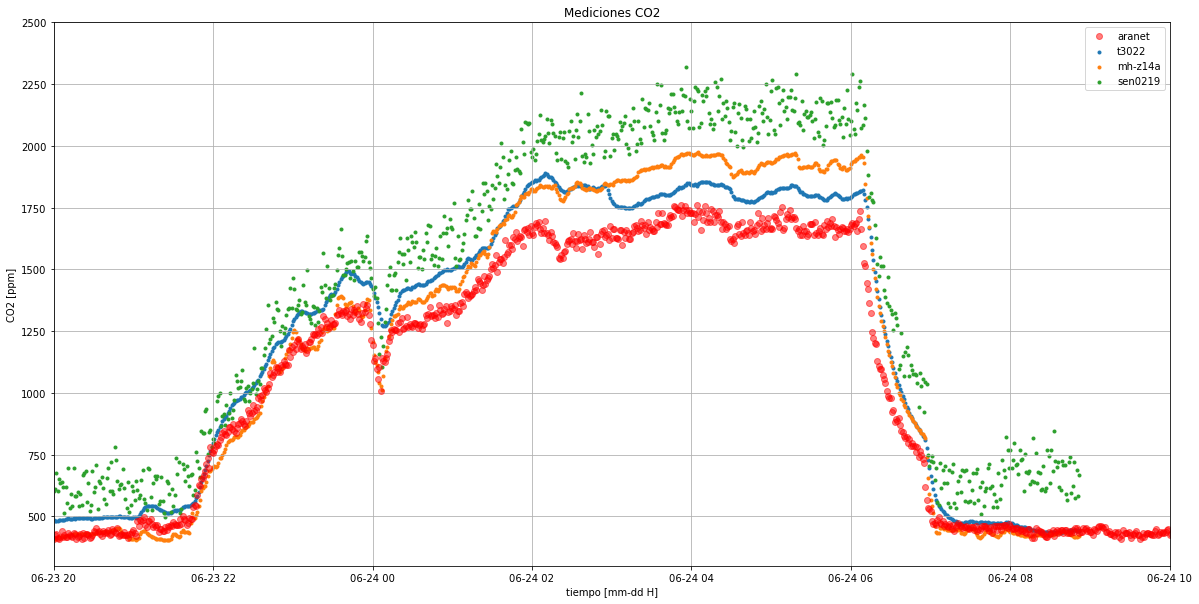

In [5]:
fig, ax = plt.subplots(figsize=(20,10))

fecha1 = parse("2021-06-23 20:00") 
fecha2 = fecha1 + pd.Timedelta("14H")

ax.set_xlim(fecha1,fecha2)
ax.set_ylim(300,2500)
ax.set_ylabel("CO2 [ppm]")
ax.set_xlabel("tiempo [mm-dd H]")
ax.set_title("Mediciones CO2")

ax.plot(aranet.aranet,"ro",label="aranet",alpha=0.5)
for sensor in sensores:
    ax.scatter(nocturna[sensor].index,nocturna[sensor],label=sensor,marker=".")


ax.legend()
ax.grid()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

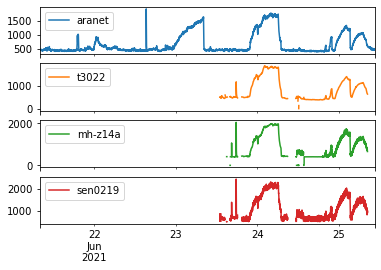

In [6]:
data = pd.concat([aranet["aranet"],nocturna[sensores]],axis=1)

data.plot(subplots=True)
# data.aranet - data.sen0219

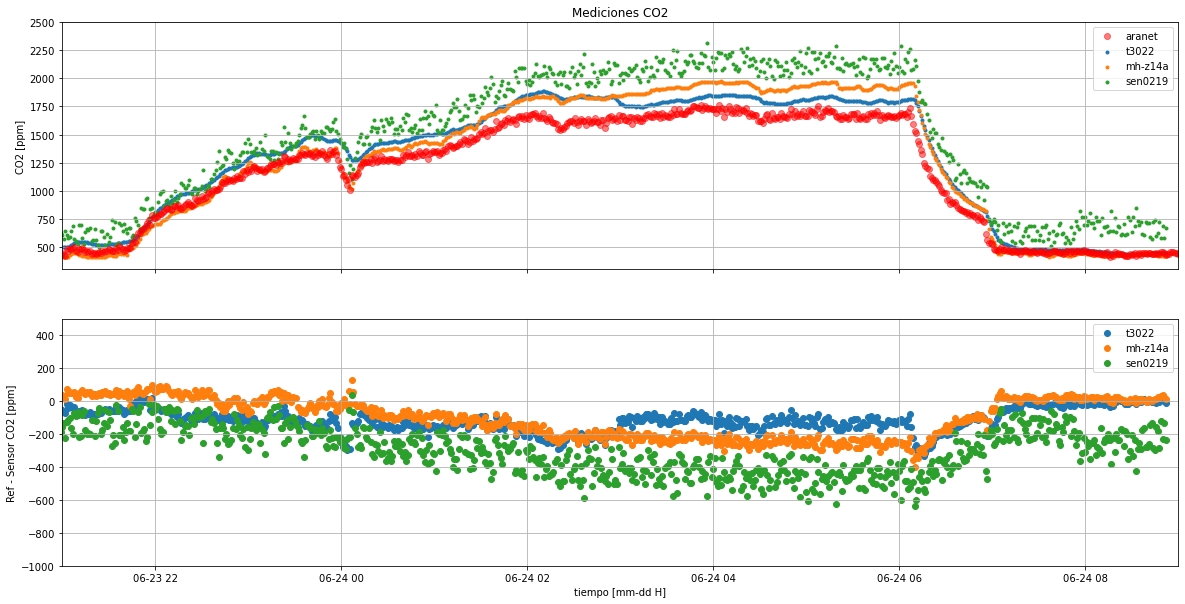

In [50]:
ref = "aranet"
fig, ax = plt.subplots(2,figsize=(20,10),sharex=True)

fecha1 = parse("2021-06-23 21:00") 
fecha2 = fecha1 + pd.Timedelta("12H")


ax[0].set_ylim(300,2500)
ax[0].set_ylabel("CO2 [ppm]")
ax[0].set_title("Mediciones CO2")


ax[0].set_xlim(fecha1,fecha2)
ax[1].set_xlim(fecha1,fecha2)

ax[1].set_ylim(-1000,500)
ax[1].set_ylabel("Ref - Sensor CO2 [ppm]")
ax[1].set_xlabel("tiempo [mm-dd H]")
# ax[1].set_title("Mediciones CO2")

ax[0].plot(aranet.aranet,"ro",label="aranet",alpha=0.5)
for sensor in sensores:
    ax[0].scatter(data[sensor].index,data[sensor],label=sensor,marker=".")


for sensor in sensores:
    ax[1].scatter(data.index,data[ref]-data[sensor],label=sensor)


ax[1].legend()
ax[1].grid()
ax[0].legend()
ax[0].grid()





diferencia = {}
datos = data[fecha1:fecha2]
for sensor in sensores:
    valor = (data[fecha1:fecha2][ref] - data[fecha1:fecha2][sensor]).mean()
    diferencia.update({sensor:[-valor]})


In [51]:
diferencia = pd.concat([datos[sensor]-datos[ref] for sensor in sensores],axis=1)
diferencia.columns = sensores

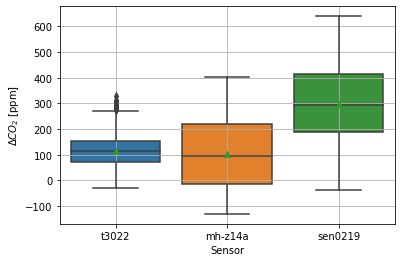

In [57]:
plt.ylabel("$\Delta CO_2$ [ppm]")
plt.xlabel("Sensor")
sns.boxplot(data=diferencia,showmeans=True)

plt.grid() 